## Replication for "Asymmetry by Design", July 19, 2021
### By Adam Goldstein and Charlie Eaton

### Figure 3: Incidence of Conversion from Single-Brand to Multi-Brand Structure at Firm-Level

In [1]:
ssc install gr0070

In [2]:
copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_unitidasymmetry.dta" ///
    data/d_unitidasymmetry.dta, replace

In [3]:
quietly {

set scheme plotplain
est clear

quietly use data/d_unitidasymmetry, clear

keep if year >1991 & year<2016

quietly collapse (rawsum) sftesale sftetotl (mean) all_under system_under grad_rate_150_p_w ///
loan_amount_borrower_c_w tuitionall_c_w selective white_share_w black_share_w hisp_share_w ///
pell_grants_per_fte_c_w ft_faculty_per_100fte_w dpcttype_health dpcttype_law ///
dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz online ///
(first) state_n (min) iclevel (max) investor law_enf_frst_this_yr multi_brand ///
, by(systemid year)
    
xtset  systemid year

gen linvestor= l.investor
gen becomemultibrand=1 if d.multi_brand==1
by systemid: drop if l.becomemultibrand ==1 | l2.becomemultibrand ==1 ///
    | l3.becomemultibrand ==1 | l4.becomemultibrand ==1 | ///
    l5.becomemultibrand ==1 | l6.becomemultibrand ==1 | ///
    l7.becomemultibrand ==1 | l8.becomemultibrand ==1 | ///
    l9.becomemultibrand ==1 | l10.becomemultibrand ==1 | ///
    l11.becomemultibrand ==1 | l12.becomemultibrand ==1 | ///
    l13.becomemultibrand ==1 | l14.becomemultibrand ==1 | ///
    l15.becomemultibrand ==1 | l16.becomemultibrand ==1 | ///
    l17.becomemultibrand ==1 | l18.becomemultibrand ==1 | ///
    l19.becomemultibrand ==1 | l20.becomemultibrand ==1 | ///
    l21.becomemultibrand ==1 | l22.becomemultibrand ==1 | ///
    l23.becomemultibrand ==1 
replace becomemultibrand=0 if becomemultibrand==. 

**Express time in terms of time at risk (to deal with left censoring)
by systemid: egen minyear=min(year)
gen time=year-minyear

stset time, id(systemid) failure(multi_brand==1)
sts test investor

**Create discrete time survival function graph for 2nd panel of figure 3
quietly sts graph, by(investor) ///
title ("Discrete Time Survival Function for Transition to Multi-Brand, By Firm Ownership" ///
    " ", margin(medium)) legend(order(1 "Privately Held" 2 "Investor-Owned")) ///
    xtitle(Years at Risk) ytitle("proportion remaining single-brand" " " " ", size(medsmall)) ///
    name(survival, replace)

collapse (sum) becomemultibrand , by (investor year)
    
qui graph bar (sum) becomemultibrand, over(investor, label(nolabel)) over(year, ///
    label(angle(forty_five))) asyvars scheme(plotplainblind) ///
    bar(1, fcolor(turquoise)) bar(2, lcolor(black) fcolor(orangebrown)) ///
    legend(order(1 "Privately Held" 2 "Investor-Owned")) ///
    title("Firm Transitions from Single-Brand to Multi-Brand Structure, by Year and Ownership" ///
    " ", margin(medium)) ytitle("number of conversions to multibrand" " ", ///
    size(medsmall)) name(transitions, replace)
}

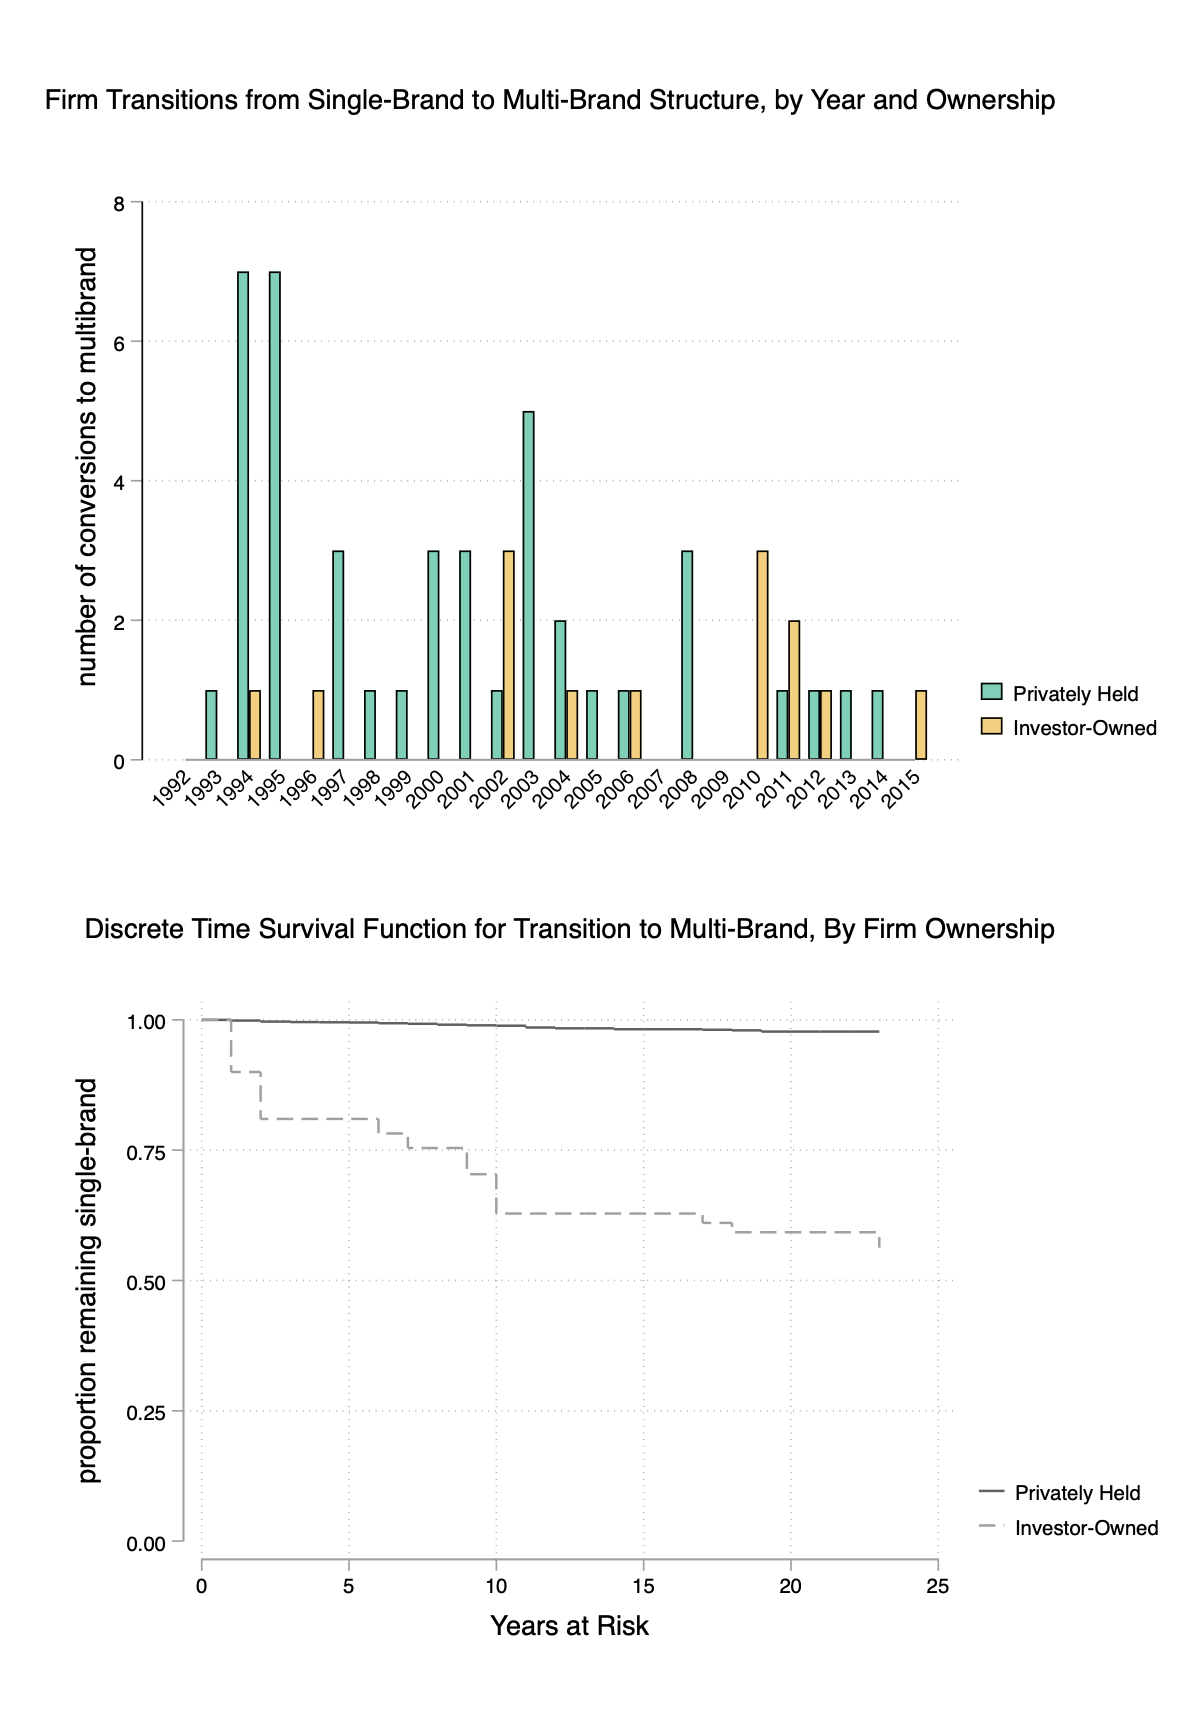

In [4]:
graph combine transitions survival ///
	, rows(2) col(1) ysize(10) xsize(7) altshrink imargin(medium)

In [5]:
qui graph export figures/f3_multibrandtransitions.pdf, replace